<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝
    - sklearn

        데이터 분리 : 훈련, 검증, 테스트 (K-Fold, cross_val_score)

        하이퍼파라미터 : GridSearchCV

    - 평가

        정확도, 오차행렬

        정밀도, 재현율

        F1 스코어, ROC 곡선, AUC
    - 분류

        결정트리

        랜덤포레스트(앙상블)
        
        XGBoost

        SVM

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

<파이썬 머신러닝 완벽 가이드, 권철민, 위키북스>

#앙상블 학습

앙상블 학습 : 여러개의 분류기를 사용하여 예측값을 얻은 다음, 그 예측값을 평균하여 분류 하는 방법

앙상블 학습 방법 : voting, bagging, boosting, stacking

#보팅(Voting)과 배깅(Bagging)

보팅과 배깅의 다른점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행에 보팅을 수행하는 것입니다.

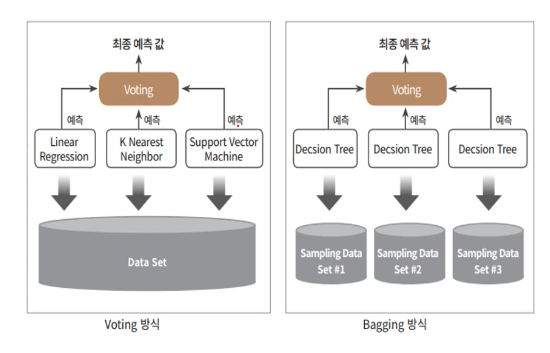

보팅은 하드 보팅과 소프트 보팅으로 나누어 집니다.

하드 보팅(Hard Voting) 과 소프트 보팅(Soft Voting)
하드 보팅의 경우 각 분류기가 예측한 결과를 다수결로 최종 class로 결정하는 방식이고, 소프트 보팅의 경우 각 분류기가 예측한 확률을 평균하여 결정하는 방식입니다.

일반적으로는 하드 보팅보다는 소프트 보팅이 예측 성능이 상대적으로 우수하여 주로 사용됩니다. 사이킷런은 VotingClassifier 클래스를 통해 보팅을 지원합니다.

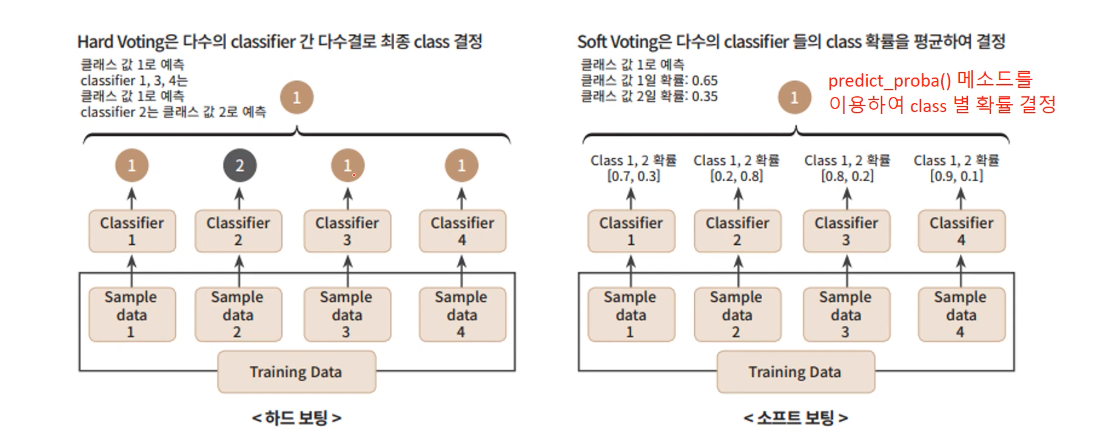

# Boosting

: 여러개의 분류기가 순차적으로 학습을 하는데, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행

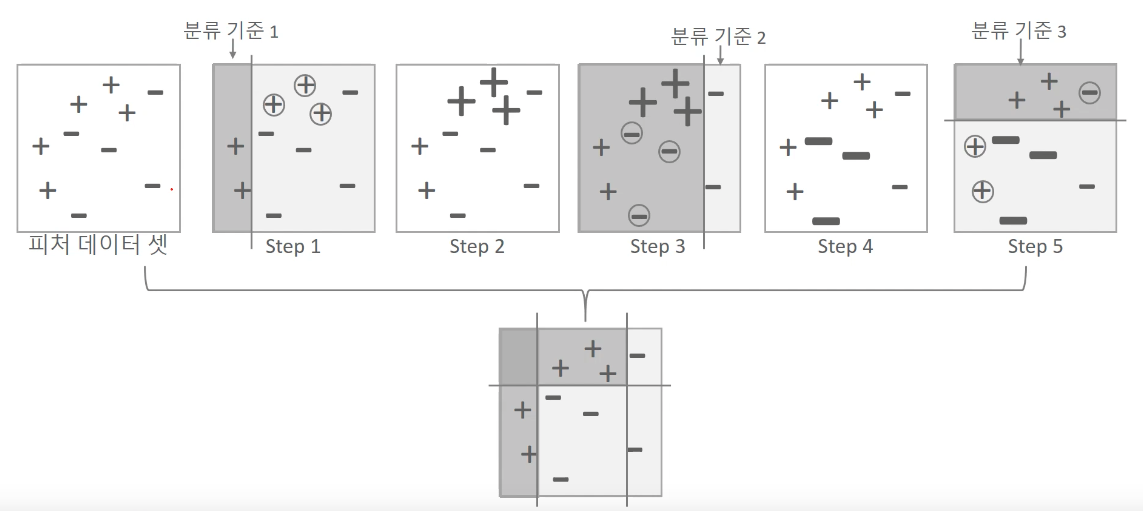

#스태킹
: 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과를 얻는 방법

#voting 방식 연습

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
cancer = load_breast_cancer()

In [ ]:
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [ ]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

In [ ]:
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

In [ ]:
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

In [ ]:
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
accuracy_score(y_test, pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9473684210526315

In [ ]:
clfs = [lr_clf, knn_clf]
for clf in clfs:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    class_name = clf.__class__.__name__
    acc = accuracy_score(y_test, pred)
    print(f'{class_name} 의 정확도 : {acc}')

LogisticRegression 의 정확도 : 0.9385964912280702
KNeighborsClassifier 의 정확도 : 0.9385964912280702


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Bagging

    bagging = Bootstrap Aggregating

    같은 알고리즘 분류기가 여러개 (100개)

    bootstrapping 방식 : 전체 데이터 개수 동일, 개별 데이터 중첩되어 있다.

    RandomForest가 대표적인 예이다.

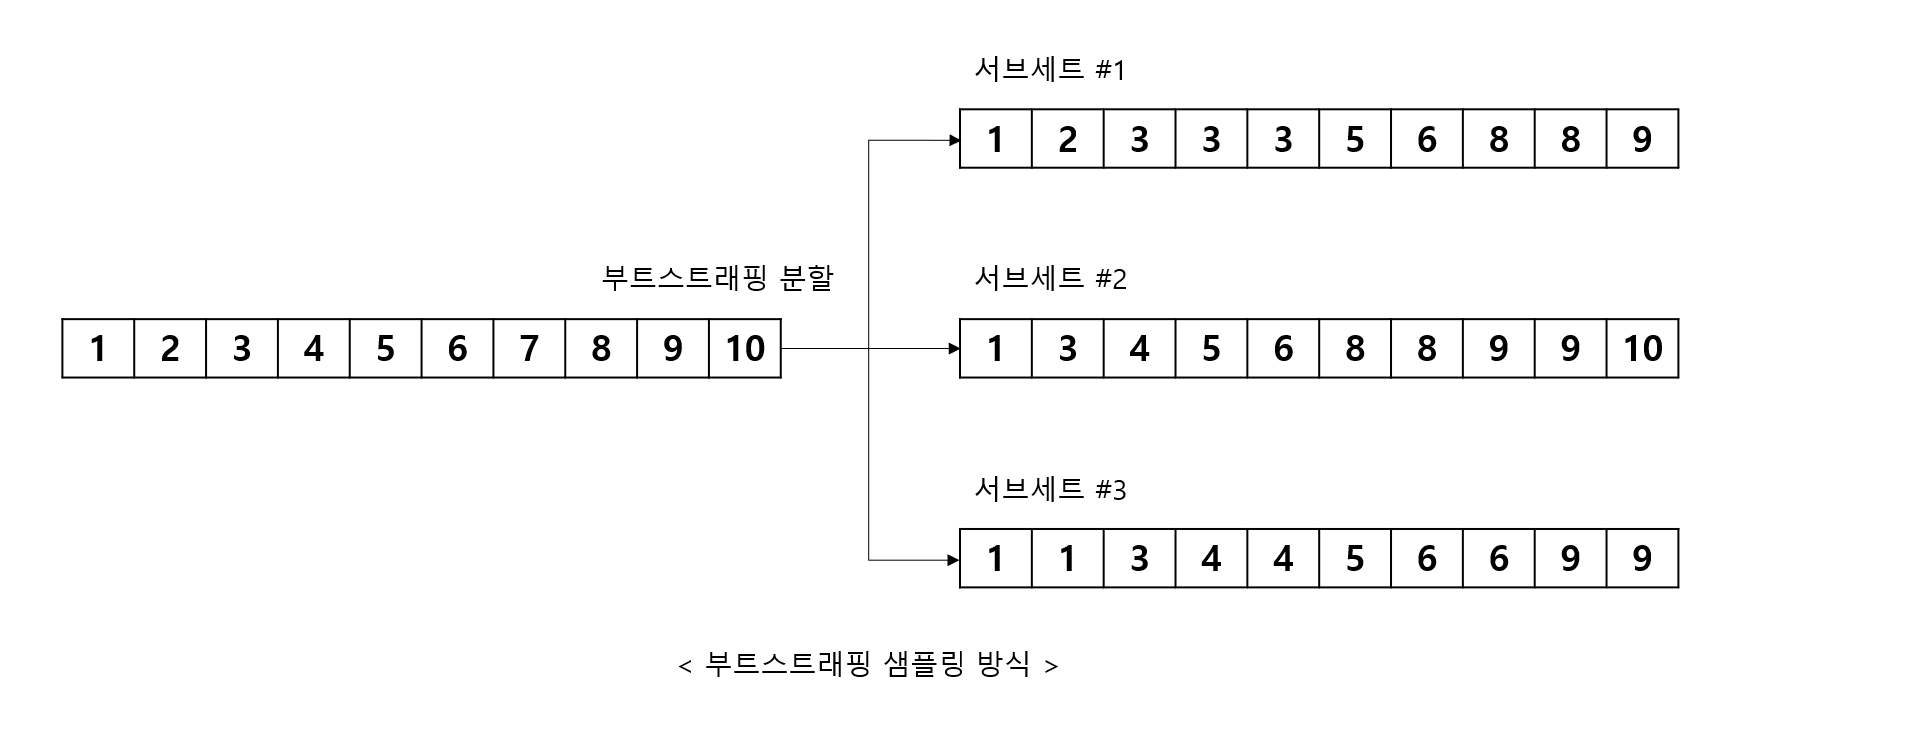

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data_df['target'] = cancer.target

In [ ]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
import seaborn as sns
sns.distplot(data_df.target, kde=False, bins=2)

NameError: ignored

In [ ]:
rf = RandomForestClassifier(random_state=156)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
acc = accuracy_score(y_test, pred)
np.round(acc, 4)

0.9474

#UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=156)
X_resampled, y_resampled = rus.fit_resample(cancer.data, cancer.target)

In [ ]:
X_resampled.shape, y_resampled.shape

((424, 30), (424,))

In [ ]:
pd.Series(y_resampled).value_counts()

0    212
1    212
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=156)
under_rf = RandomForestClassifier(random_state=156)
under_rf.fit(X_train, y_train)
pred = under_rf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(np.round(acc,4))

0.9529


#SMOTE (Synthetic Minority Over-sampling Technique)

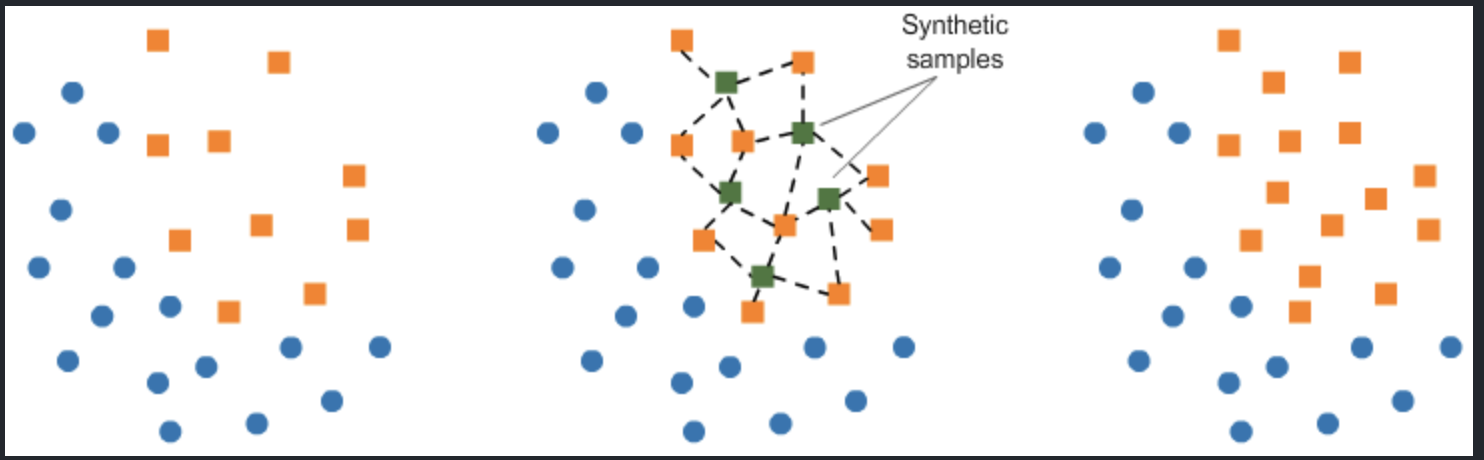

In [ ]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=156)
X_resampled, y_resampled = smo.fit_resample(cancer.data, cancer.target)

NameError: ignored

In [ ]:
X_resampled.shape, y_resampled.shape

((714, 30), (714,))

In [ ]:
pd.Series(y_resampled).value_counts()

0    357
1    357
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=156)
over_rf = RandomForestClassifier(random_state=156)
over_rf.fit(X_train, y_train)
pred = over_rf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(np.round(acc,4))

0.979


1. gridsearchcv 하기 -> best_estimator_ 의 정확도 산출

    params = {'n_estimators':[100,200,300], 'max_depth':[6, 8, 10, 12],
    'min_samples_split':[8, 16, 20]}

2. feature_importances_ 그래프 그려주세요.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[100,200,300], 'max_depth':[6, 8, 10, 12],
          'min_samples_split':[8, 16, 20]}

In [ ]:
rf = RandomForestClassifier(random_state=156)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 300}

In [ ]:
grid_cv.best_score_

0.9562262299104405

In [ ]:
rf_best = grid_cv.best_estimator_
pred = rf_best.predict(X_test)
accuracy_score(y_test, pred)

0.9790209790209791

<Axes: >

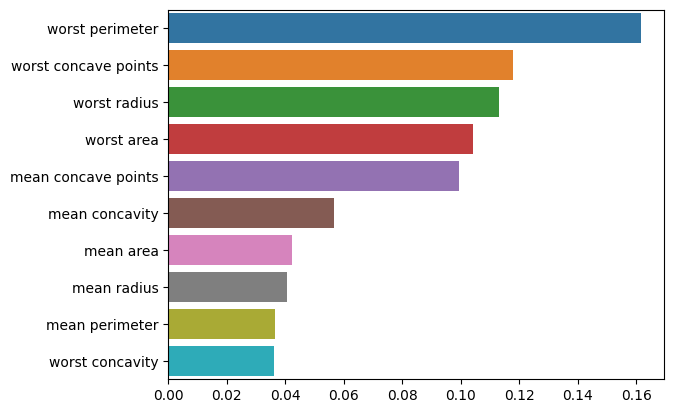

In [ ]:
ftr_importance = pd.Series(rf_best.feature_importances_, index=cancer.feature_names)
ftr_10 = ftr_importance.sort_values(ascending=False)[:10]
sns.barplot(x=ftr_10, y=ftr_10.index)

In [ ]:
df = pd.read_csv('./drive/MyDrive/data/product_train.csv')

In [ ]:
df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [ ]:
df.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [ ]:
df.target.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [ ]:
df.target.tail()

61873    Class_9
61874    Class_9
61875    Class_9
61876    Class_9
61877    Class_9
Name: target, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_target = le.fit_transform(df.target)

In [ ]:
df_target

array([0, 0, 0, ..., 8, 8, 8])

In [ ]:
df_target = df.target.apply(lambda x: int(x[-1]))

In [ ]:
df_target

0        1
1        1
2        1
3        1
4        1
        ..
61873    9
61874    9
61875    9
61876    9
61877    9
Name: target, Length: 61878, dtype: int64

In [ ]:
df_target.value_counts()

2    16122
6    14135
8     8464
3     8004
9     4955
7     2839
5     2739
4     2691
1     1929
Name: target, dtype: int64

<ipython-input-21-38bbaf45ac66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_target, kde=False)


<Axes: xlabel='target'>

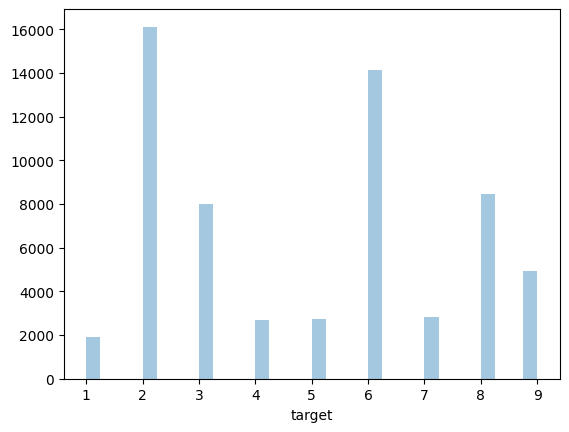

In [ ]:
sns.distplot(df_target, kde=False)

In [ ]:
df_target.isnull().sum()

0

In [ ]:
df.info()

In [ ]:
df_features = df.iloc[:, :-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target,
                                                    test_size=0.2, random_state=156)

In [ ]:
rfc = RandomForestClassifier(random_state=156)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
accuracy_score(y_test, pred)

0.9941014867485456

In [ ]:
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [ ]:
df.tail()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9
61877,61878,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Class_9


In [ ]:
df_features = df.iloc[:, 1:-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target,
                                                    test_size=0.2, random_state=156)

In [ ]:
rfc = RandomForestClassifier(random_state=156)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
accuracy_score(y_test, pred)

0.8053490627020039

In [ ]:
rfc_handson = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=4,
    random_state=156
)

In [ ]:
rfc_handson.fit(X_train, y_train)
pred = rfc_handson.predict(X_test)
accuracy_score(y_test, pred)

0.8108435681965094

In [ ]:
df_target.value_counts()/df_target.count()*100

2    26.054494
6    22.843337
8    13.678529
3    12.935130
9     8.007693
7     4.588060
5     4.426452
4     4.348880
1     3.117425
Name: target, dtype: float64

In [ ]:
y_train.value_counts()/y_train.count()*100

2    26.130257
6    22.776858
8    13.708537
3    12.953012
9     7.951194
7     4.547291
5     4.476587
4     4.391742
1     3.064523
Name: target, dtype: float64

In [ ]:
y_test.value_counts()/y_test.count()*100

2    25.751454
6    23.109244
8    13.558500
3    12.863607
9     8.233678
7     4.751131
5     4.225921
4     4.177440
1     3.329024
Name: target, dtype: float64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=156)
X_resample, y_resample = rus.fit_resample(df_features, df_target)
pd.Series(y_resample).value_counts()

1    1929
2    1929
3    1929
4    1929
5    1929
6    1929
7    1929
8    1929
9    1929
Name: target, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,
                                                    test_size=0.2, random_state=156)

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=4, random_state=156)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
accuracy_score(y_test, pred)

0.7854880506766484

In [ ]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=156)
X_resample, y_resample = smo.fit_resample(df_features, df_target)

In [ ]:
pd.Series(y_resample).value_counts()

1    16122
2    16122
3    16122
4    16122
5    16122
6    16122
7    16122
8    16122
9    16122
Name: target, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,
                                                    test_size=0.2, random_state=156)

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=2, random_state=156)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
accuracy_score(y_test, pred)

0.9103376981392143

#XGBoost

= GBM 고급버전

GBM 동작 방식

약한 학습기 1

(X_train, y_train) 으로 학습

y1_pred_train = X_train 데이터로 예측

y2_train = y_train - y1_pred_train = (실제값) - (예측값) = 잔차

약한 학습기 2

(X_train, y2_train) 학습 => 잔차를 예측한다.

y2_pred_train = X_train 데이터로 예측

y3_train = y2_train - y2_pred_train = 실제값 - 예측값 = 잔차

약한 학습기 3

(위 과정 반복)

## 최종 예측값 얻을 때


y = y1_pred + y2_pred + y3_pred

(여기에서의 pred 값은 X_test 값을 사용하여 구한다)



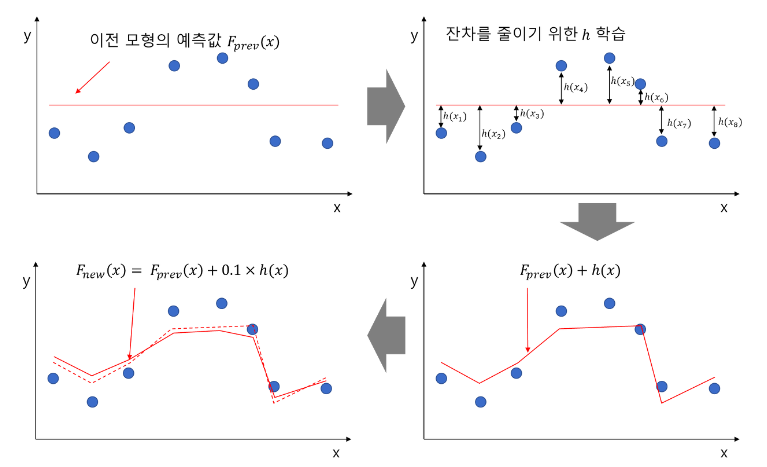

실제값 - 예측값 = 잔차


실제값 예측 = 예측값 + 잔차 예측값

XGBoost -> GBM 고급 , 작동방식 같음 -> 잔차를 예측 -> DT 3개를 사용해서 구현 -> 회귀에 맞는 데이터와 회귀모델을 사용하자

In [ ]:
df_bikes = pd.read_csv('./drive/MyDrive/data/bike_rentals.csv')

In [ ]:
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB


In [ ]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,728.000000,726.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500000,6.512329,0.028728,2.997264,0.682627,1.395349,0.495587,0.474512,0.627987,0.190476,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500343,3.448303,0.167155,2.004787,0.465773,0.544894,0.183094,0.163017,0.142331,0.077725,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.521562,0.134494,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730104,0.233218,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_bikes.isna().sum()

instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           3
windspeed     5
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df_bikes.isna().sum().sum()

12

In [ ]:
df_bikes[df_bikes.isna().any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,NaN,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,NaN,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,NaN,664,3698,4362
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,NaN,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,NaN,0.205850,801,4044,4845
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,NaN,404,3490,3894
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,NaN,0.123767,439,3900,4339
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,NaN,477,4495,4972
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649
730,731,2012-12-31,1.0,NaN,NaN,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
df_bikes.windspeed.median()

0.180971

In [ ]:
df_bikes['windspeed'].fillna((df_bikes['windspeed'].median()), inplace=True)

In [ ]:
df_bikes.iloc[[56, 81, 128]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,0.180971,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,0.180971,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,0.180971,664,3698,4362
